# Creating a Polarized Mie scattering table

This notebook demonstrates how to create a Mie scattering table using src/polarized/make_mie_table.f90. 

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [1]:
"""
Imports necessary for this notebook
"""
import os 
import numpy as np
import matplotlib.pyplot as plt
from shdom import MiePolarized

'\nImports necessary for this notebook\n'

In [8]:
mie = MiePolarized()

wavelength_band = (0.8, 0.8)
particle_type='Water' 
distribution='gamma'
alpha=7.0

mie.set_parameters(wavelength_band=wavelength_band,
                   particle_type=particle_type,
                   distribution=distribution,
                   alpha=alpha)

num_effective_radii=50
start_effective_radius=5.0
end_effective_radius=20.0
max_integration_radius=75.0
log_space_reff=False

mie.compute_table(num_effective_radii=num_effective_radii,
                  start_effective_radius=start_effective_radius,
                  end_effective_radius=end_effective_radius,
                  max_integration_radius=max_integration_radius,
                  log_space_reff=log_space_reff)

Computing mie table...
Done.


In [9]:
""" 
Create a directory (if doesnt exist) and write the Polarized Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables'

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_800nm_pol.scat')

mie.write_table(output_path)

' \nCreate a directory (if doesnt exist) and write the Polarized Mie table, that was created \nin the previous cell, for for later use.\n'

Writing mie table to file: ../mie_tables/Water_800nm_pol.scat
Done.


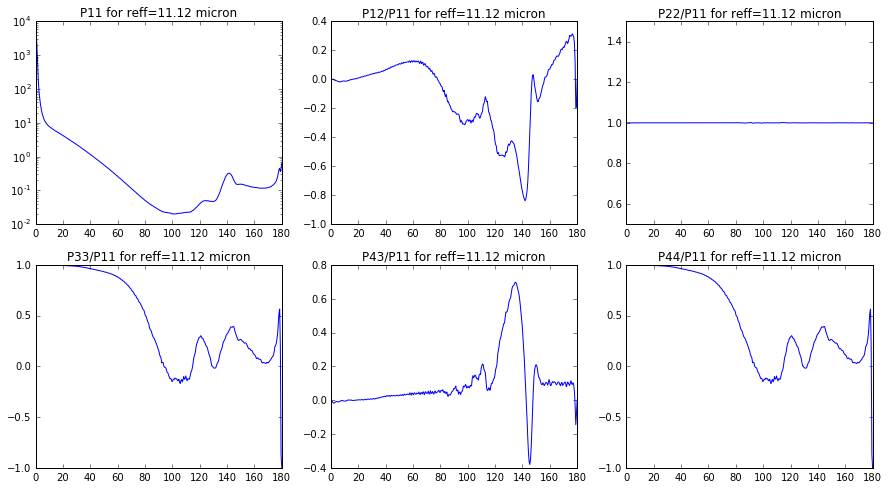

In [51]:
"""
Convert wigner coefficients into a scattering phase function matrix and plot all components
See Figure 2 of the IPRT comparison project: https://arxiv.org/pdf/1901.01813.pdf
"""

plot_index = 20
plot_re = mie.reff[plot_index]

angles = np.linspace(0,180, 360)
phase = []
for i in range(1,7):
    phase.append(mie.transform_wignerd_to_phase(plot_index, phase_element=i, angles=angles))
    
%matplotlib inline
f, axes = plt.subplots(2, 3, figsize=(15,8));
axes[0, 0].semilogy(angles, phase[0]);
axes[0, 0].set_title('P11 for reff=%2.2f micron' %plot_re);
axes[0, 1].plot(angles, phase[4]/phase[0]);
axes[0, 1].set_title('P12/P11 for reff=%2.2f micron' %plot_re);
axes[0, 2].plot(angles, phase[1]/phase[0]);
axes[0, 2].set_title('P22/P11 for reff=%2.2f micron' %plot_re);
axes[0, 2].set_ylim([0.5,1.5]);
axes[1, 0].plot(angles, phase[3]/phase[0]);
axes[1, 0].set_title('P33/P11 for reff=%2.2f micron' %plot_re);
axes[1, 1].plot(angles, phase[5]/phase[0]);
axes[1, 1].set_title('P43/P11 for reff=%2.2f micron' %plot_re);
axes[1, 2].plot(angles, phase[2]/phase[0]);
axes[1, 2].set_title('P44/P11 for reff=%2.2f micron' %plot_re);